In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [8]:
cut_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE', 'HDL_1','DBP_1','Waist_1', 'HDL_2','DBP_2','Waist_2', 'TG_1', 'TG_2']]

In [9]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
cut_df = cut_df[(cut_df['COHORT'] != 3)]
cut_df

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,DBP_1,Waist_1,HDL_2,DBP_2,Waist_2,TG_1,TG_2
0,S0001,SMI,2,M,60,61,74.0,80.9,77.0,78.0,83.0,81,75.0
1,S0002,SMI,2,M,61,60,90.0,95.4,59.0,92.0,90.5,106,101.0
2,S0003,SMI,2,F,52,40,89.0,88.4,40.0,80.0,86.5,231,183.0
3,S0004,SMI,2,F,41,58,74.0,75.5,54.0,83.0,77.0,94,78.0
4,S0005,SMI,2,F,41,81,75.0,70.5,72.0,68.0,66.5,70,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,61,61.0,75.0,NaN,NaN,NaN,51,NaN
384,MetS_S0281,MetS,1,F,44,45,87.0,90.0,NaN,NaN,NaN,104,NaN
385,MetS_S0282,MetS,1,F,37,53,88.0,91.0,NaN,NaN,NaN,128,NaN
386,MetS_S0283,MetS,1,M,51,57,103.0,85.0,NaN,NaN,NaN,163,NaN


In [11]:
#x 배열 생성
#n1=1차 방문 데이터
#n2=2차 방문 데이터
X1=cut_df[['HDL_1','DBP_1','Waist_1']].values
X2=cut_df[['HDL_2','DBP_2','Waist_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성
Y1= cut_df[['TG_1']].values
Y2= cut_df[['TG_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [12]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [13]:
np.random.seed(0)
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)

#train, test set split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

# MLP (수치 예측형 모델)

In [16]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=100, batch_size=4)
model.evaluate(x_test, y_test) 

Epoch 1/100
127/127 [==============================] - 1s 794us/step - loss: nan - mse: nan
Epoch 2/100
127/127 [==============================] - 0s 643us/step - loss: nan - mse: nan
Epoch 3/100
127/127 [==============================] - 0s 675us/step - loss: nan - mse: nan
Epoch 4/100
127/127 [==============================] - 0s 714us/step - loss: nan - mse: nan
Epoch 5/100
127/127 [==============================] - 0s 643us/step - loss: nan - mse: nan
Epoch 6/100
127/127 [==============================] - 0s 643us/step - loss: nan - mse: nan
Epoch 7/100
127/127 [==============================] - 0s 643us/step - loss: nan - mse: nan
Epoch 8/100
127/127 [==============================] - 0s 651us/step - loss: nan - mse: nan
Epoch 9/100
127/127 [==============================] - 0s 627us/step - loss: nan - mse: nan
Epoch 10/100
127/127 [==============================] - 0s 706us/step - loss: nan - mse: nan
Epoch 11/100
127/127 [==============================] - 0s 603us/step - loss: n

[nan, nan]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [18]:
# FONT 한글깨질때 폰트깨질때
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

<AxesSubplot:>

C:\Users\yangb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yangb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


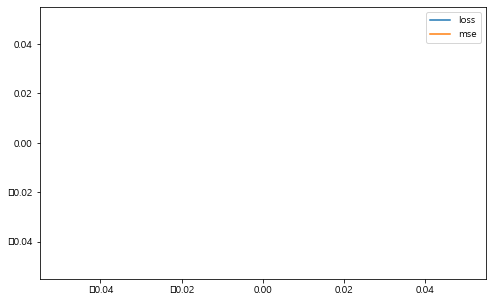

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [21]:
y_p = model.predict(x_test)

#numpy to list flatten(2dim -> 1dim)
y_test_list=np.array(y_test).flatten().tolist()
y_p_list=np.array(y_p).flatten().tolist()
y_train_list=np.array(y_train).flatten().tolist()

In [22]:
#오차 범위 10 설정 (**오차범위 수정**)

scores = 0
for i in range(len(y_test)):
    if  y_train_list[i]-10 <= y_p_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 0.00 %
test set prediction accuracy: 0.00 %
